In [1]:
from pathlib import Path
import json

import pandas as pd
import shapely.geometry as sg

import new_gtfs_tools as gt  # Collection of GTFS tools from previous homeworks

%load_ext autoreload
%autoreload 2

DATA_DIR = Path('..')/'data'

# Problem 2

In [2]:
# Test read_gtfs
#
path = DATA_DIR/'auckland_gtfs_20161017.zip'
feed = gt.read_gtfs(path)
feed.stops.head()

,stop_lat,zone_id,stop_lon,stop_id,parent_station,stop_desc,stop_name,location_type,stop_code
0,-36.77869,NaN,174.75143,3382,41344,NaN,9 Nile Rd,0,3382
1,-36.82308,NaN,174.80429,3480,41023,NaN,40 Vauxhall Rd,0,3480
2,-36.87175,NaN,174.60227,21094,NaN,NaN,Metcalfe Rd and Ranui,1,21094
3,-36.89001,NaN,174.77511,11542,NaN,NaN,Manukau Rd and King George,1,11542
4,-36.89261,NaN,174.77465,11543,NaN,NaN,Manukau Rd and Queen Mary,1,11543


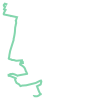

In [3]:
# Test build_geometry_by_shape 
#
geometry_by_shape = feed.build_geometry_by_shape()
shape_id = feed.trips['shape_id'].iat[0]  # First trip
geom = geometry_by_shape[shape_id]
geom

In [4]:
# Test trip_to_geojoson
#
trip_id = feed.trips['trip_id'].iat[0]  
geoj = feed.trip_to_geojson(trip_id)
json.dumps(geoj)

# Paste into geojson.io

'{"properties": {"trip_id": "14306060378-20161011155909_v46.26", "route_id": "route_091", "direction_id": 1, "block_id": "n/a", "trip_headsign": "Mangere", "service_id": "14306060378-20161011155909_v46.26", "shape_id": "1209-20161011155909_v46.26"}, "type": "Feature", "geometry": {"type": "LineString", "coordinates": [[174.76428, -36.85111], [174.76436999999999, -36.85114], [174.76442, -36.851009999999995], [174.76452, -36.8509], [174.76448, -36.85088], [174.7635, -36.8506], [174.76275, -36.850390000000004], [174.7627, -36.85038], [174.76264, -36.85052], [174.76243, -36.85095], [174.76234, -36.851079999999996], [174.76225, -36.85116], [174.76217, -36.851209999999995], [174.76188, -36.85135], [174.7616, -36.85148], [174.76153, -36.85158], [174.76137, -36.85183], [174.76127, -36.85219], [174.76127, -36.85229], [174.76138, -36.85289], [174.76141, -36.852990000000005], [174.76148999999998, -36.853159999999995], [174.7616, -36.853359999999995], [174.76171000000002, -36.85352], [174.76192, -

In [5]:
# Test compute_screen_line_counts
#
# A trip should intersect itself
shape_id = feed.trips['shape_id'].iat[0]
print(shape_id)

screen_line = feed.build_geometry_by_shape(shape_ids=[shape_id])[shape_id]

counts = feed.compute_screen_line_counts(screen_line)
print(counts.head())

shape_id in counts['shape_id'].values



1209-20161011155909_v46.26
                             trip_id   route_id route_short_name  \
0  14306060378-20161011155909_v46.26  route_091              309   
1  14306060390-20161011155909_v46.26  route_091              309   
2  14306060351-20161011155909_v46.26  route_091              309   
3  14306060328-20161011155909_v46.26  route_091              309   
4  14306060389-20161011155909_v46.26  route_091              309   

   direction_id                    shape_id  
0             1  1209-20161011155909_v46.26  
1             1  1209-20161011155909_v46.26  
2             1  1209-20161011155909_v46.26  
3             1  1209-20161011155909_v46.26  
4             1  1209-20161011155909_v46.26  


True

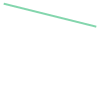

In [6]:
# Create a screen line across the Auckland Harbour Bridge;
# see http://geojson.io/#id=gist:anonymous/1ef5babe013688950587e853310cda9d&map=14/-36.8301/174.7439
#
screen_line_json = {
    "type": "Feature",
    "properties": {},
    "geometry": {
        "type": "LineString",
        "coordinates": [
          [
            174.74158287048337,
            -36.83037852590646
          ],
          [
            174.74905014038086,
            -36.832233404901814
          ]
        ]
    }
}

screen_line = sg.shape(screen_line_json["geometry"])
screen_line

In [7]:
counts = feed.compute_screen_line_counts(screen_line)
counts

,trip_id,route_id,route_short_name,direction_id,shape_id
0,3922046164-20161011151756_v46.25,route_274,922,1,560-20161011151756_v46.25
1,3922053258-20161011151756_v46.25,route_274,922,0,559-20161011151756_v46.25
2,3922046194-20161011151756_v46.25,route_274,922,1,560-20161011151756_v46.25
3,3922053246-20161011151756_v46.25,route_274,922,0,559-20161011151756_v46.25
4,3922046189-20161011155909_v46.26,route_274,922,1,483-20161011155909_v46.26
5,3922046201-20161011151756_v46.25,route_274,922,1,560-20161011151756_v46.25
6,3922053270-20161011151756_v46.25,route_274,922,0,559-20161011151756_v46.25
7,3922046199-20161011151756_v46.25,route_274,922,1,560-20161011151756_v46.25
8,3922046174-20161011155909_v46.26,route_274,922,1,483-20161011155909_v46.26
9,3922053247-20161011155909_v46.26,route_274,922,0,482-20161011155909_v46.26
